# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import analysis_functions as af
from scipy import stats

# Load the CSV file
file_path = 'C:\\Users\\USER\\Documents\\GitHub\\project_final\\1_data_cleaning\\data_cleaned.csv'
df_analysis = pd.read_csv(file_path)

In [2]:
df_analysis

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


### Purchase Amount and Descriptive Statistics

In [3]:
df_analysis = af.calculate_purchase_amount(df_analysis)
stats = af.calculate_descriptive_stats(df_analysis)
print("Descriptive Statistics:\n", stats)

Descriptive Statistics:
 {'mean_purchase_amount': 17.98779487699964, 'median_purchase_amount': 9.75, 'mode_purchase_amount': 15.0, 'mean_quantity': 9.55224954743324, 'median_quantity': 3.0, 'mode_quantity': 1}


### Identifying Top Product Categories

In [4]:
top_categories = af.get_top_categories(df_analysis)
print("Top Product Categories:\n", top_categories)

Top Product Categories:
 description
PICNIC BASKET WICKER 60 PIECES      19809.75
TEA TIME TEA TOWELS                  3022.50
MISELTOE HEART WREATH CREAM           996.00
SET/5 RED SPOTTY LID GLASS BOWLS      734.40
WEEKEND BAG VINTAGE ROSE PAISLEY      527.85
Name: total_purchase, dtype: float64


## Data Visualization

### Distribution of Purchases across the Top 15 Product Categories

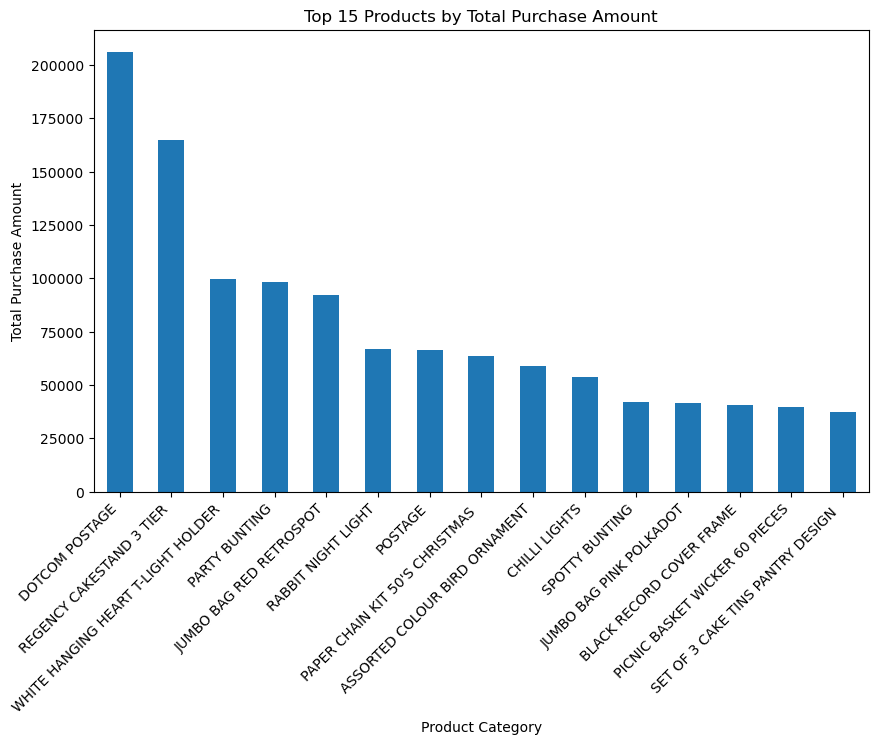

In [5]:
af.plot_bar_chart(df_analysis)

### Sales Trends Over Time

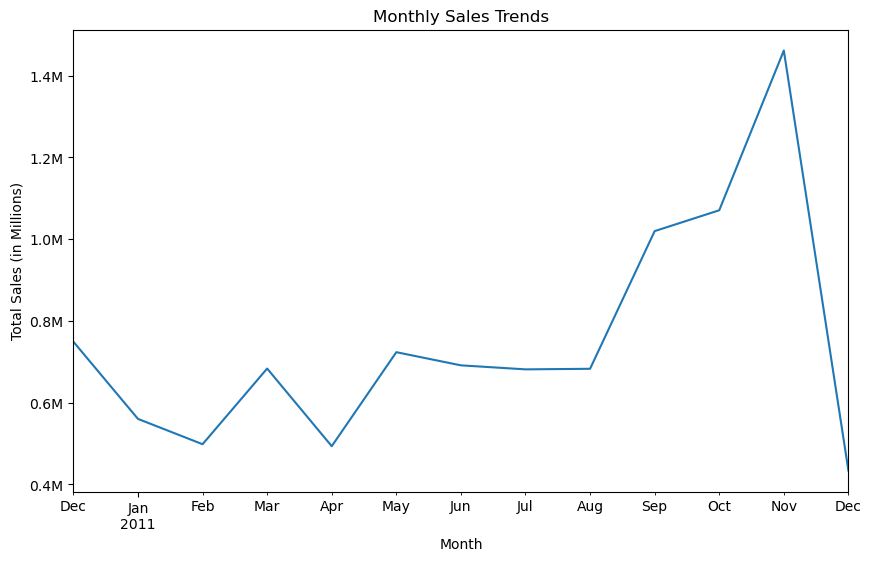

In [6]:
af.plot_line_graph(df_analysis)

### Correlation Between Product Categories and Purchase Amounts

This correlation matrix helps identify which products are commonly bought together, providing insights for inventory management, promotions, and cross-selling strategies.

c:\Users\USER\Documents\GitHub\project_final\2_data_analysis\analysis_functions.py:73: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cooccurrence_matrix = cooccurrence_matrix.applymap(lambda x: 1 if x > 0 else 0)


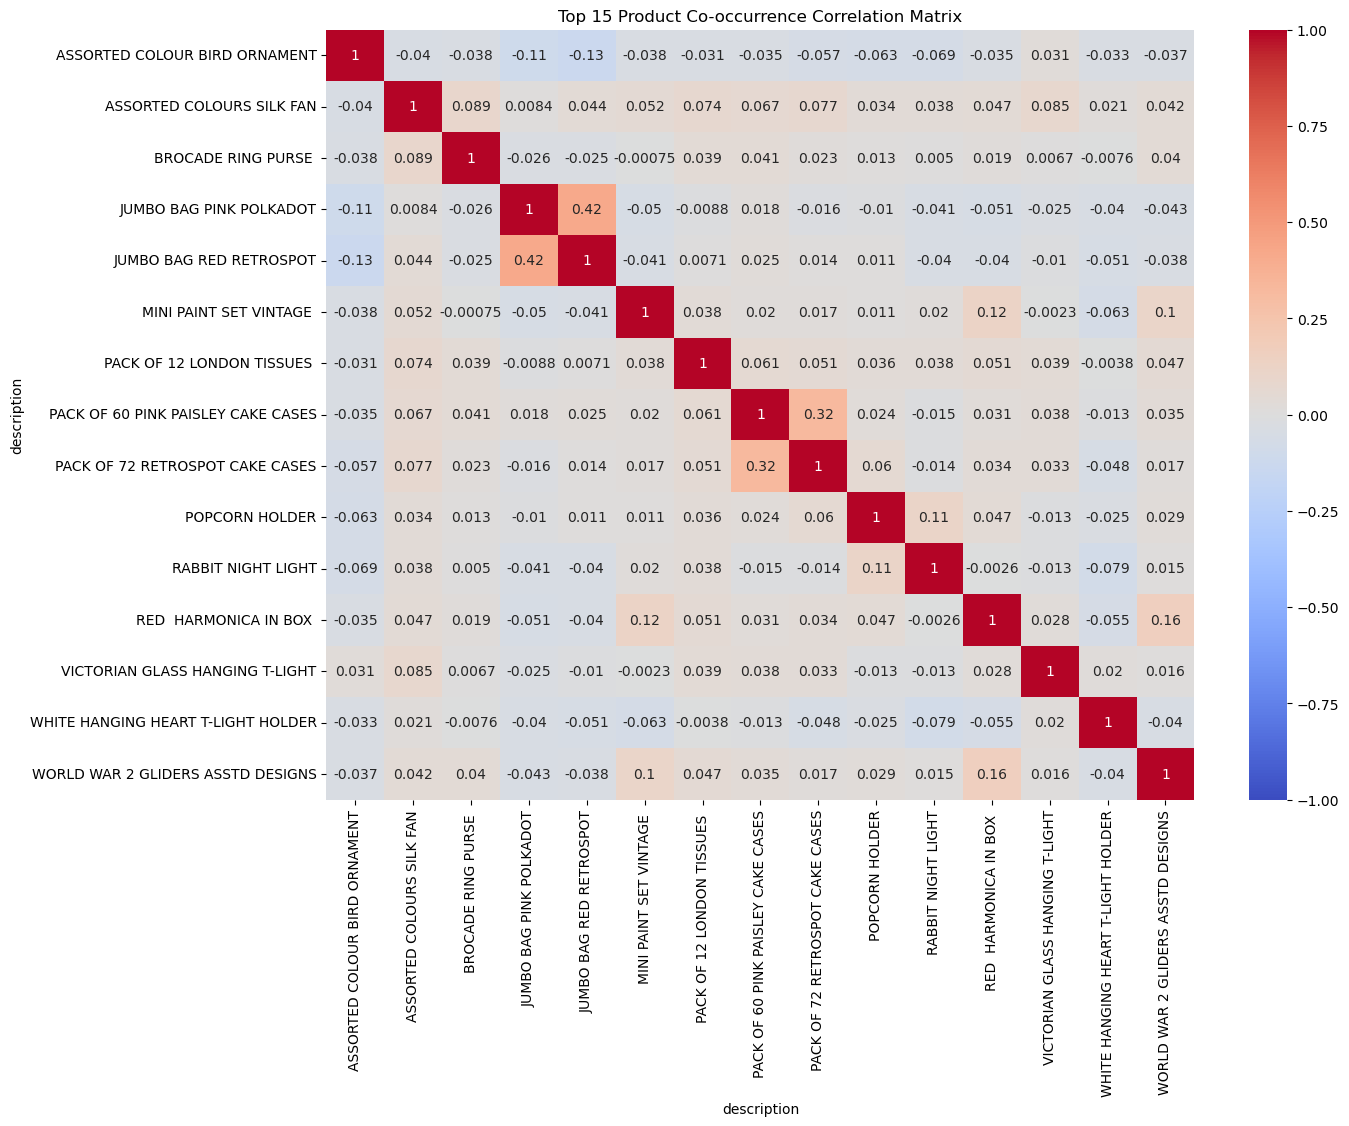

In [7]:
af.plot_product_cooccurrence_heatmap(df_analysis)

## Feature Hypothesis

In [8]:
# Convert invoicedate to datetime if not already done
df_analysis['invoicedate'] = pd.to_datetime(df_analysis['invoicedate'])

# Step 2: Extract date features
df_analysis = af.extract_date_features(df_analysis)

### Hypothesis 1: Weekday vs. Weekend Purchase Behavior

- Customers are more likely to purchase home decor items (e.g., "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN") on weekends (Saturday and Sunday) compared to weekdays.

In [17]:
# Step 3: Test Hypothesis 1 - "Weekday vs. Weekend Purchase Behavior"
category = 'WHITE HANGING HEART T-LIGHT HOLDER'
sales_weekday, sales_weekend = af.aggregate_sales_by_day_type(df_analysis, category)

# Inspect the sales data
print(f"Weekday Sales (daily): {sales_weekday}")
print(f"Weekend Sales (daily): {sales_weekend}")

# Check if both sales_weekday and sales_weekend have valid, non-zero, non-identical data
if sales_weekday.empty or sales_weekend.empty:
    print(f"Cannot perform t-test: Insufficient data for either weekdays or weekends for {category}")
else:
    # Run the t-test on the daily sales data
    t_stat, p_value = af.t_test_weekday_vs_weekend(sales_weekday, sales_weekend)
    print(f"Hypothesis 1 - T-statistic: {t_stat}, P-value: {p_value}")

Hypothesis 1 - T-statistic: nan, P-value: nan


- Interpretation: If the p-value is less than 0.05, we reject the null hypothesis, indicating a significant difference in sales between weekdays and weekends.

#### Visualization

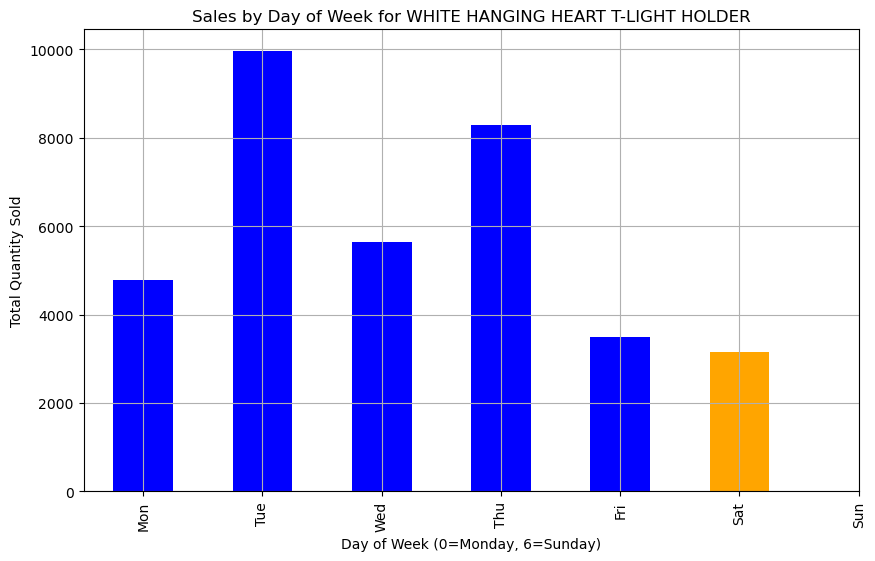

In [10]:
af.plot_sales_by_day_type(df_analysis, category)

### Hypothesis 2: Impact of Discounts on Purchase Quantity

- Products that are discounted (indicated by a lower unitprice compared to the average) see a significant increase in purchase quantity compared to when they are sold at the regular price.

In [11]:
#

Hypothesis 2 - T-statistic: nan, P-value: nan


c:\Users\USER\anaconda3\envs\final_project\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\USER\anaconda3\envs\final_project\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


- Interpretation: If the p-value is less than 0.05, we reject the null hypothesis, indicating a significant difference in sales between discounted and regular prices.

#### Visualization

IndexError: index 0 is out of bounds for axis 0 with size 0

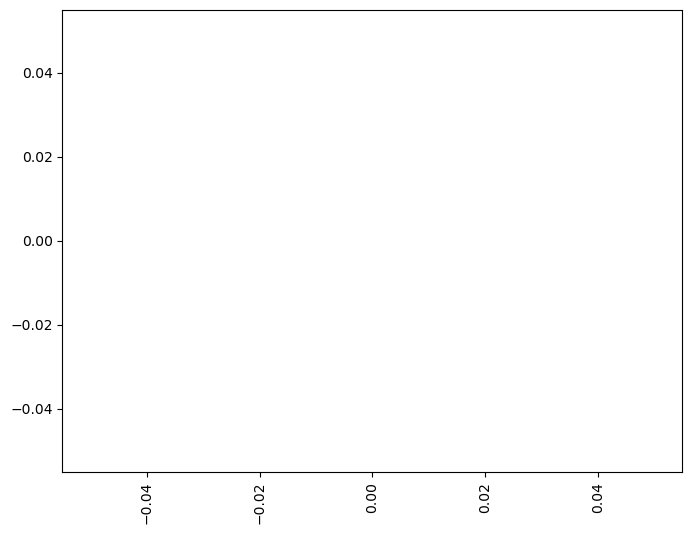

In [12]:
af.plot_discounted_vs_regular_sales(df_analysis, category)

## Customer Segmentation

In [8]:
segmented_customers_manual = af.generate_customer_segments_manual(df_analysis)
segmented_customers_manual['overall_segment'].value_counts()

overall_segment
Medium Spending / Low Frequency             1782
Medium Spending / Medium Frequency           644
High Spending / High Frequency               496
High Spending / Medium Frequency             485
High Spending / Very High Frequency          243
Very High Spending / Very High Frequency     211
Low Spending / Low Frequency                 156
High Spending / Low Frequency                146
Medium Spending / High Frequency              96
nan Spending / Low Frequency                  44
Very High Spending / High Frequency           34
Very High Spending / Medium Frequency         13
Low Spending / Medium Frequency                8
nan Spending / Medium Frequency                5
nan Spending / Very High Frequency             4
Medium Spending / Very High Frequency          2
Very High Spending / Low Frequency             2
nan Spending / High Frequency                  1
Low Spending / High Frequency                  1
Name: count, dtype: int64

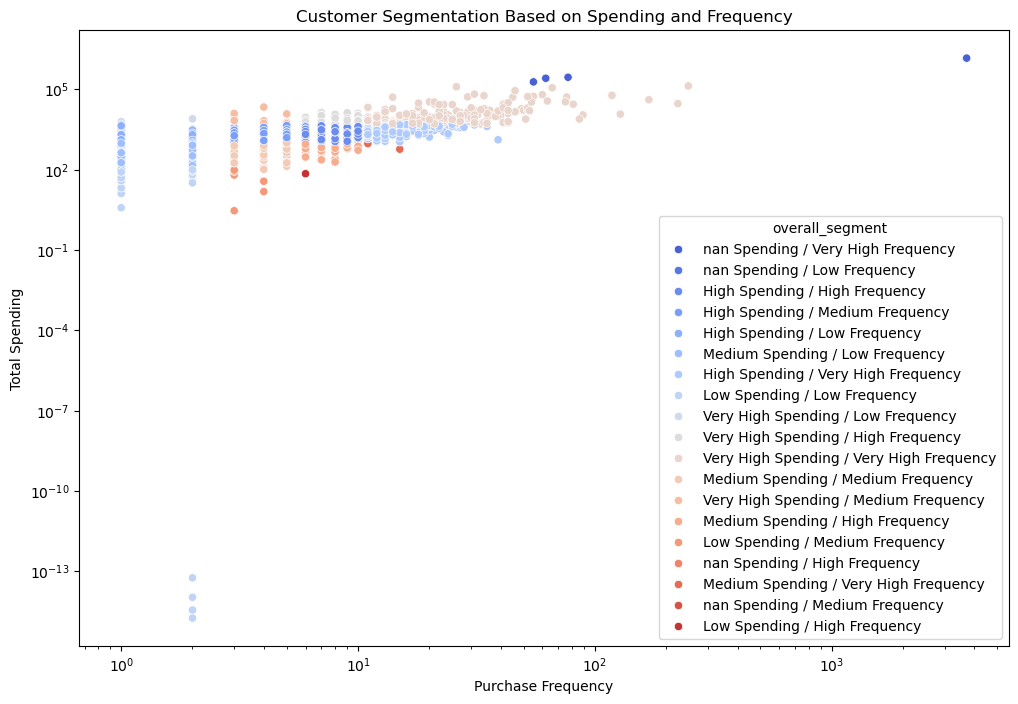

In [9]:
af.visualize_customer_segments(segmented_customers_manual)

### Analyze Season Trends

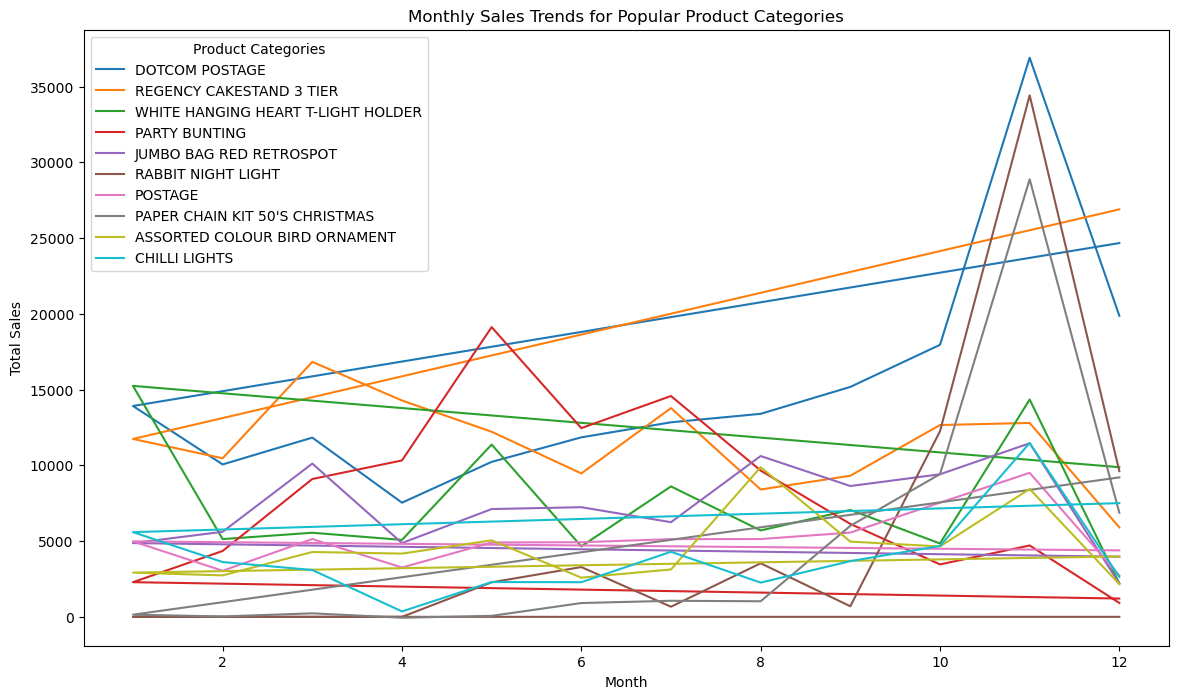

In [10]:
# Step 2: Prepare the monthly sales data
monthly_sales = af.prepare_monthly_sales(df_analysis)

# Step 3: Plot seasonal trends for the top 10 product categories
af.plot_seasonal_trends(monthly_sales, top_n=10)

*Observations*:

- **Seasonal Spikes**: Several product categories, such as "DOTCOM POSTAGE," "REGENCY CAKESTAND 3 TIER," and "CHILLI LIGHTS," exhibit significant sales spikes around month 12, which likely corresponds to December (the holiday season).
- **Steady Growth**: Some categories show a more consistent growth pattern throughout the year without drastic fluctuations.
- **Holiday Impact**: Products like "PAPER CHAIN KIT 50'S CHRISTMAS" also show a sharp increase towards the end of the year, suggesting a holiday-related impact on sales.